In [36]:
import torch
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [3]:
X_train = utils.createMNIST('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
Y_train = utils.createMNIST('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')

X_test = utils.createMNIST('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
Y_test = utils.createMNIST('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

In [7]:
Y_test.shape

(10000, 1)

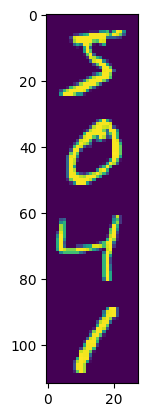

In [35]:
plt.imshow(X_train[0:4].reshape(28*4, 28))

In [13]:
from PIL import Image

img = Image.fromarray(X_train[0])
img

In [17]:
picture = Image.open('/Users/daxire/Desktop/MNIST/chase.jpeg')
pix = np.array(picture)
pix.shape

(374, 230, 3)

In [21]:

img = Image.fromarray(X_train[0:4].reshape(28*4, 28))
img

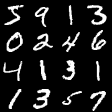

In [33]:
n = 4
img = np.concatenate(X_train[0:n*n].reshape(n, 28*n, 28), axis=1)
Image.fromarray(img)


In [37]:
class Deepnetworks(torch.nn.Module):

    def __init__(self):

        super().__init__()
        self.l1 = nn.Linear(784, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
    
    def forward(self, x):

        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)

        return x

model = Deepnetworks()
loss_func = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr = 0.2)

In [38]:
model

Deepnetworks(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (act): ReLU()
  (l2): Linear(in_features=128, out_features=10, bias=True)
)

In [39]:
sample = np.random.randint(0, X_train.shape[0], size=32)

In [40]:
sample

array([32289, 34482, 26806, 23825,  5497,  6298,  4472, 39807,  7990,
       46631,  2641, 16888, 27471, 31322, 45301, 12644, 19531, 44428,
       42911,  7224, 56549, 46343, 55233,  2401, 10377, 30143, 39654,
       48917, 31101, 59022,  7416, 49372])

In [41]:
batch_size = 32

for i in range(1000):

    sample = np.random.randint(0, X_train.shape[0], size=batch_size)

    X = torch.tensor(X_train[sample]).float()
    Y = torch.tensor(Y_train[sample])

    out = model(X)
    optim.zero_grad()
    loss = loss_func(out, Y)
    loss.backward()
    optim.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (896x28 and 784x128)